In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords  
from nltk.corpus import wordnet as wn
from nltk.tag import pos_tag
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import squarify


AttributeError: 'SubPattern' object has no attribute 'pattern'

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

AttributeError: 'SubPattern' object has no attribute 'pattern'

In [3]:
df=pd.read_csv("Bitathon_dataset.csv")

In [4]:
df.sample(10)

,dispute,complaint
1865,0,I was supposed to receive my closing documents...
3070,0,"Ref Case number : XXXX Again unfortunately, th..."
1859,0,Our loan was sold by XXXX to XXXX. We were not...
2156,0,Started XXXX trying to do a modification of th...
369,0,I previously filed a complaint against XXXX Mo...
2885,0,Documents were sent to XXXX for a loss XXXX re...
238,0,CMPNY4785 located in XXXX TX has been calling ...
3312,0,My ex wife was awarded the property in our div...
2181,0,After my wife and I had extreme financial prob...
2208,0,Trying to process a short sale. For over 2 mon...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dispute    3362 non-null   object
 1   complaint  3199 non-null   object
dtypes: object(2)
memory usage: 53.5+ KB


In [6]:
#CONSTANTS
to_be_removed=["month","year","get","letter","sent","u","date","day","bank","call","bank","company","back","xxxx","nt"," u "]
stopwords=stopwords.words('english')
stopwords=stopwords+to_be_removed
# snowball_stemmer = SnowballStemmer("english")
wnl = WordNetLemmatizer()

In [7]:
df = df[df["complaint"].notna()]

In [8]:
df["dispute"].unique()

array(['0'], dtype=object)

In [9]:
df["complaint"]=df["complaint"].str.lower()

In [10]:
#Data Manipulation (Stop words removal,nouns selection,lemmatization)
word_list=[]
def data_prep(text):
    text=text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[0-9]', '', text)
    text=" ".join(t for t in text.split() if t not in stopwords)
    text=" ".join(t for t in text.split() if t not in to_be_removed)
    is_noun = lambda pos: pos[:2] == 'NN'
    text=" ".join(t for (t,pos) in nltk.pos_tag(text.split()) if is_noun(pos) )
#     for t in text.split():
#         word_list.append(wnl.lemmatize(t))
    text=" ".join([wnl.lemmatize(t) for t in text.split()])
#     text=" ".join([snowball_stemmer.stem(wnl.lemmatize(t)) for t in text.split()])
    for x in word_tokenize(text):
        word_list.append(x)
    return text


In [11]:
df["complaint_new"]=df["complaint"].apply(lambda x:data_prep(x))

In [12]:
df["complaint_new"]

0       homeownership advisor fax confirmation today c...
1       want file complaint home life loan modificatio...
2       mortgage holder bankrupt loan result sell tree...
3       wife fha chapter bankruptcy protection mortgag...
4       review lender month modification document sale...
                              ...                        
3410    issue issue loan modification agreement agreem...
3411    husband check credit report mortgage payment m...
3412    concern investor owner mortgage loan servicer ...
3413    document effort foreclosure fee loan mortgage ...
3414    event house damage damage mortgage loss draft ...
Name: complaint_new, Length: 3199, dtype: object

In [31]:
df=df.reset_index()

In [14]:
df["Word_list"]=df["complaint_new"].apply(lambda x:word_tokenize(x))

In [15]:
word_list

['homeownership',
 'advisor',
 'fax',
 'confirmation',
 'today',
 'check',
 'status',
 'want',
 'file',
 'complaint',
 'home',
 'life',
 'loan',
 'modification',
 'year',
 'home',
 'lawsuit',
 'thats',
 'mortgage',
 'payment',
 'rite',
 'home',
 'one',
 'everything',
 'mortgage',
 'holder',
 'bankrupt',
 'loan',
 'result',
 'sell',
 'tree',
 'account',
 'pay',
 'property',
 'tax',
 'insurance',
 'account',
 'state',
 'lender',
 'account',
 'mortgage',
 'rate',
 'mortgage',
 'mortgage',
 'payment',
 'pay',
 'cover',
 'payment',
 'property',
 'tax',
 'insurance',
 'statement',
 'tree',
 'payment',
 'pay',
 'acknowledge',
 'escrow',
 'account',
 'payment',
 'attempt',
 'term',
 'loan',
 'mortgage',
 'bill',
 'dollar',
 'shortage',
 'amount',
 'escrow',
 'shortage',
 'dollar',
 'insurance',
 'property',
 'tax',
 'justify',
 'increase',
 'dollar',
 'tree',
 'escrow',
 'account',
 'disclosure',
 'statement',
 'calculation',
 'justify',
 'increase',
 'day',
 'escrow',
 'account',
 'disclosure

In [16]:
# is_noun = lambda pos: pos[:2] == 'NN'
# word_list=[word for (word, pos) in nltk.pos_tag(word_list) if is_noun(pos)] 

# MOST FREQUENT WORDS

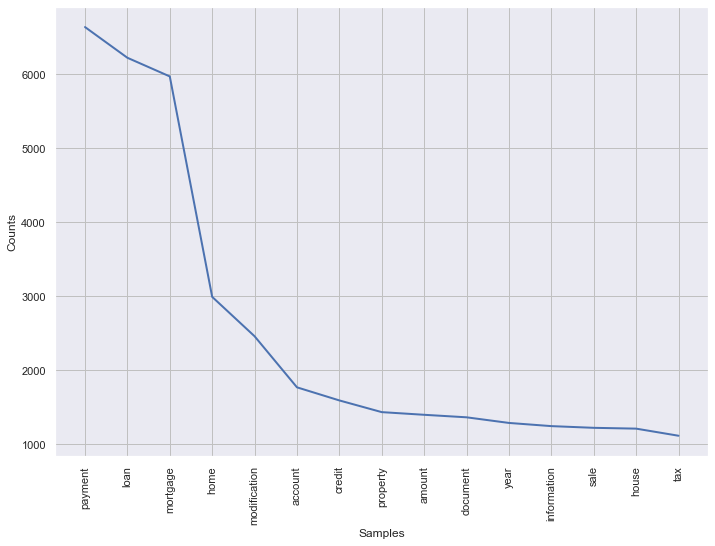

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
%matplotlib inline
sns.set(rc={"figure.figsize":(11.7,8.27)})
sns.set_style("darkgrid")
nlp_words=nltk.FreqDist(word_list)
nlp_words.plot(15)

# Complaints are focused on....


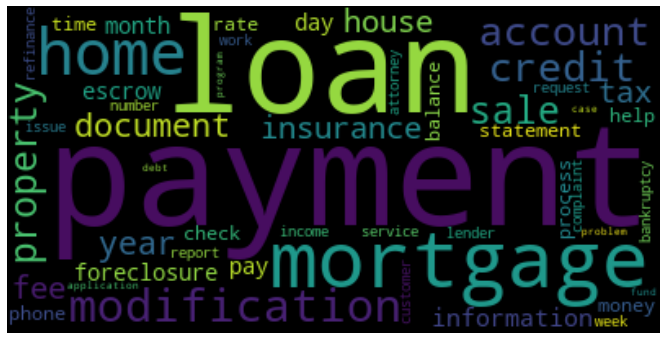

In [18]:
#Creating WordCLoud
vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(df["complaint_new"])
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df_cloud = pd.DataFrame(lst1, columns=feature_names)
df_cloud.T.sum(axis=1)
Cloud = WordCloud(max_words=50).generate_from_frequencies(df_cloud.T.sum(axis=1))
plt.figure()
plt.imshow(Cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# TFIDF Vectorizer for assiging word frequency scores

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [39]:
tf=TfidfVectorizer()
#transformed train reviews
X=tf.fit_transform(df["complaint_new"])


# Clustering Using K-means

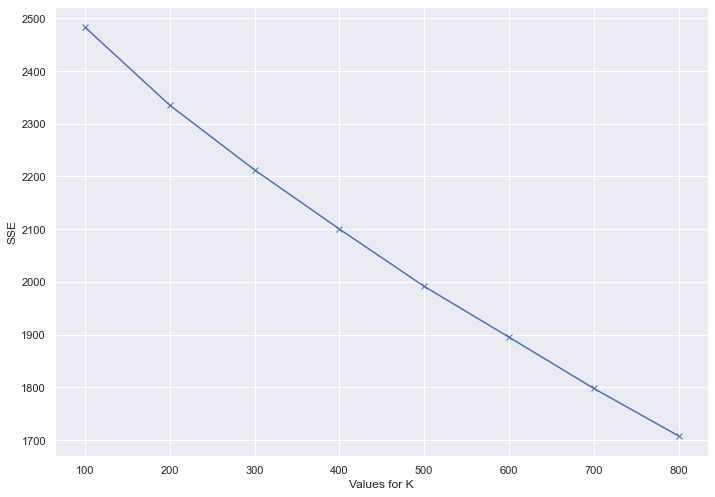

In [21]:
sse={}
for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Values for K")
plt.ylabel("SSE")
plt.show();

In [56]:
#Grouping complaints in clusters
kmeans = KMeans(n_clusters=200)
result = pd.concat([df["complaint_new"],pd.DataFrame(X.toarray(),columns=tf.get_feature_names())],axis=1)
result["cluster"]=kmeans.fit_predict(X)


In [57]:
labels=kmeans.labels_

# Complaints assigned to different clusters 

In [59]:
result[["complaint_new","cluster"]]

,complaint_new,cluster
0,homeownership advisor fax confirmation today c...,132
1,want file complaint home life loan modificatio...,35
2,mortgage holder bankrupt loan result sell tree...,18
3,wife fha chapter bankruptcy protection mortgag...,93
4,review lender month modification document sale...,192
...,...,...
3194,issue issue loan modification agreement agreem...,62
3195,husband check credit report mortgage payment m...,27
3196,concern investor owner mortgage loan servicer ...,181
3197,document effort foreclosure fee loan mortgage ...,88


# Clustering visualiztions based on most number of complaints

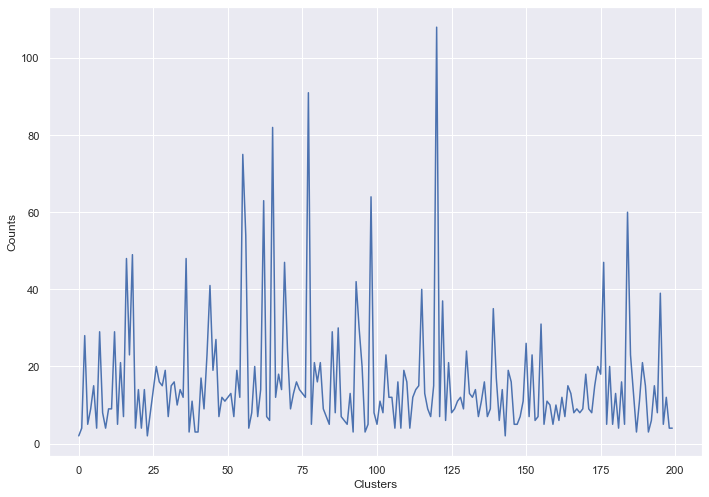

In [52]:

result["cluster"].value_counts()
cluster_x=[]
count_y=[]
for x,y in result["cluster"].value_counts().items():
    cluster_x.append(x)
    count_y.append(y)
plt.xlabel("Clusters")
plt.ylabel("Counts")
sns.lineplot(x=cluster_x, y=count_y)
plt.show()

# We can further explore major clusters to categorize problems in-depth. Also we can use some of the frequent words in these clusters to predict the seriousness of the complaints

<AxesSubplot:>

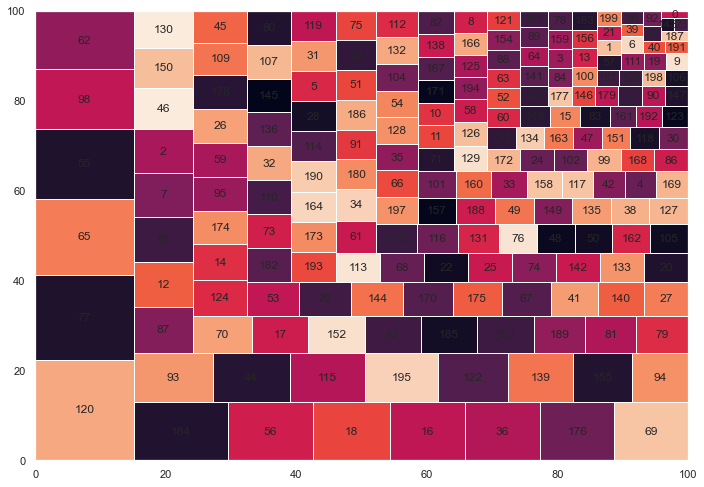

In [53]:
squarify.plot(sizes=count_y, label=cluster_x)

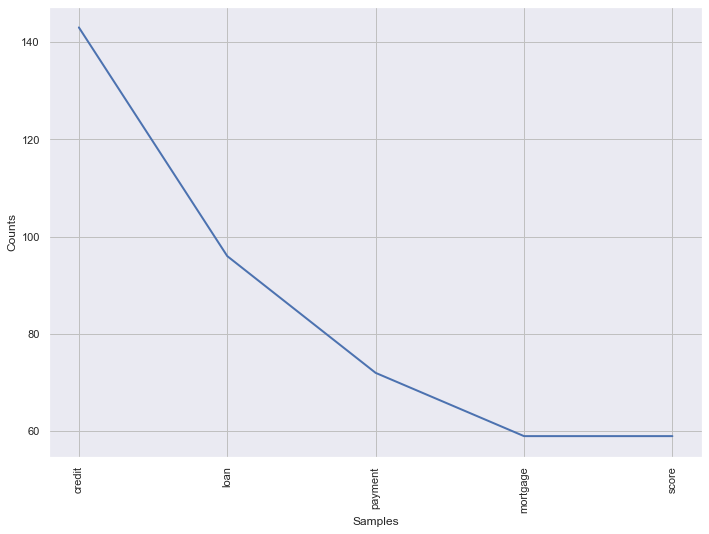

In [68]:
#function for finding most frequent complaint related words in a cluster.
#Lets try to find some common complaints in cluster 77
def most_freq_problems(result,cluster):
    check=[]
    for x in result["complaint_new"][result["cluster"]==cluster]:
        for y in word_tokenize(x):
            check.append(y)
    %matplotlib inline
    sns.set(rc={"figure.figsize":(11.7,8.27)})
    sns.set_style("darkgrid")
    nlp_words=nltk.FreqDist(check)
    nlp_words.plot(5)
most_freq_problems(result,77)

# USING LDA-By seeing these plots we can majority of the problems are revolving around Loan , Payment, Insurance, Credit, Home Loans, Mortage, Modification of policies

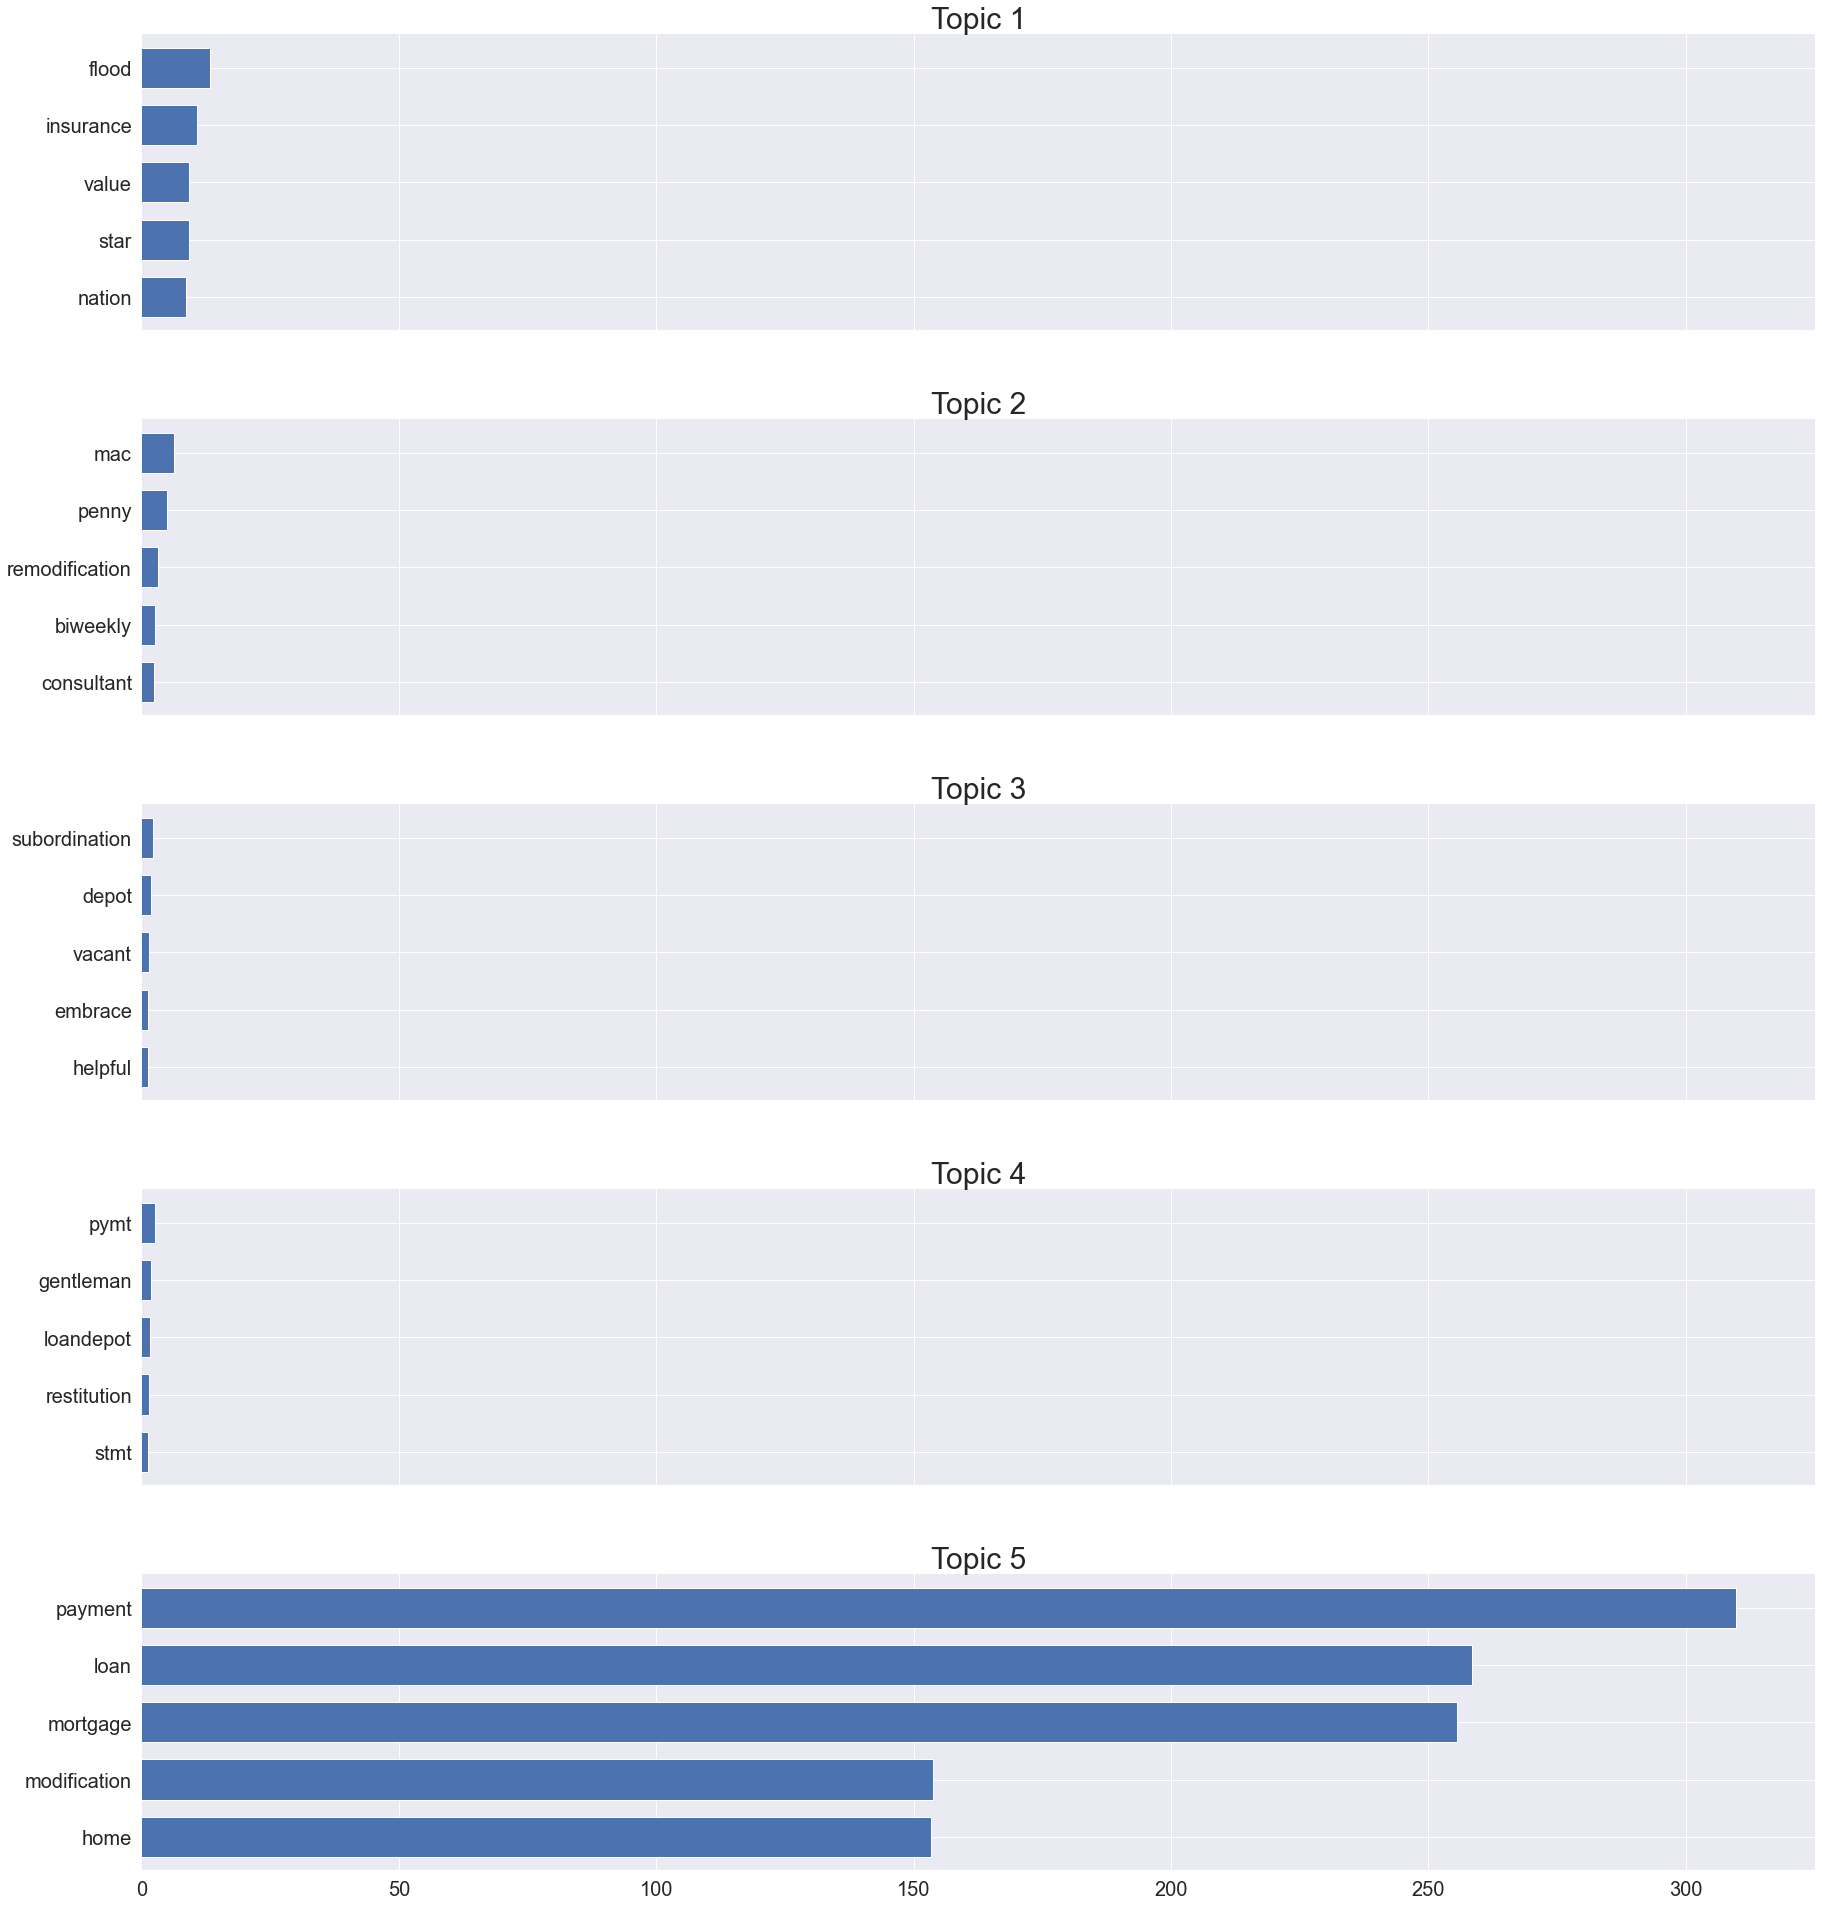

In [38]:
# LatentDirichletAllocation LDA identifies patterns in word frequency to probabilistically estimate the topics of documents and the words used in those topics. 
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, learning_decay=0.9)
X_lda = lda.fit(X)

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5,1, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 5
feature_names = tf.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')